In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

In [2]:
cd = pd.read_csv('Company_Data.csv')

In [3]:
cd

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [4]:
cd_nrow = cd.shape[0]

In [5]:
def lost_record():

    cd_nrow_now = cd.shape[0]
    lost = cd_nrow - cd_nrow_now
    lost = (lost/cd_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


# Performing EDA In Dataset

In [6]:
cd.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [7]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
cd.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))

In [10]:
uni(cd)


 All Unique Value in Sales
[ 0.    0.16  0.37  0.53  0.91  1.42  1.82  2.05  2.07  2.23  2.34  2.52
  2.66  2.67  2.86  2.93  2.99  3.02  3.07  3.13  3.15  3.24  3.42  3.45
  3.47  3.58  3.62  3.63  3.67  3.72  3.89  3.9   3.91  3.98  4.1   4.11
  4.12  4.15  4.16  4.17  4.19  4.2   4.21  4.34  4.36  4.38  4.42  4.43
  4.47  4.53  4.55  4.56  4.62  4.67  4.68  4.69  4.74  4.78  4.81  4.83
  4.88  4.9   4.94  4.95  4.96  4.97  4.99  5.01  5.04  5.05  5.07  5.08
  5.12  5.16  5.17  5.21  5.25  5.27  5.28  5.3   5.31  5.32  5.33  5.35
  5.36  5.4   5.42  5.47  5.52  5.53  5.55  5.56  5.57  5.58  5.61  5.64
  5.68  5.71  5.73  5.74  5.81  5.83  5.86  5.87  5.9   5.93  5.94  5.97
  5.98  5.99  6.01  6.03  6.1   6.11  6.14  6.15  6.18  6.2   6.23  6.37
  6.38  6.39  6.41  6.42  6.43  6.44  6.5   6.52  6.53  6.54  6.56  6.59
  6.62  6.63  6.64  6.67  6.68  6.71  6.8   6.81  6.85  6.87  6.88  6.89
  6.9   6.92  6.93  6.95  6.97  6.98  7.02  7.22  7.23  7.3   7.32  7.36
  7.37  7.38  7.4   7.4

Checking for Duplicated Values

In [11]:
cd[cd.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

# Visualizing The Data
# Ploting Boxplot

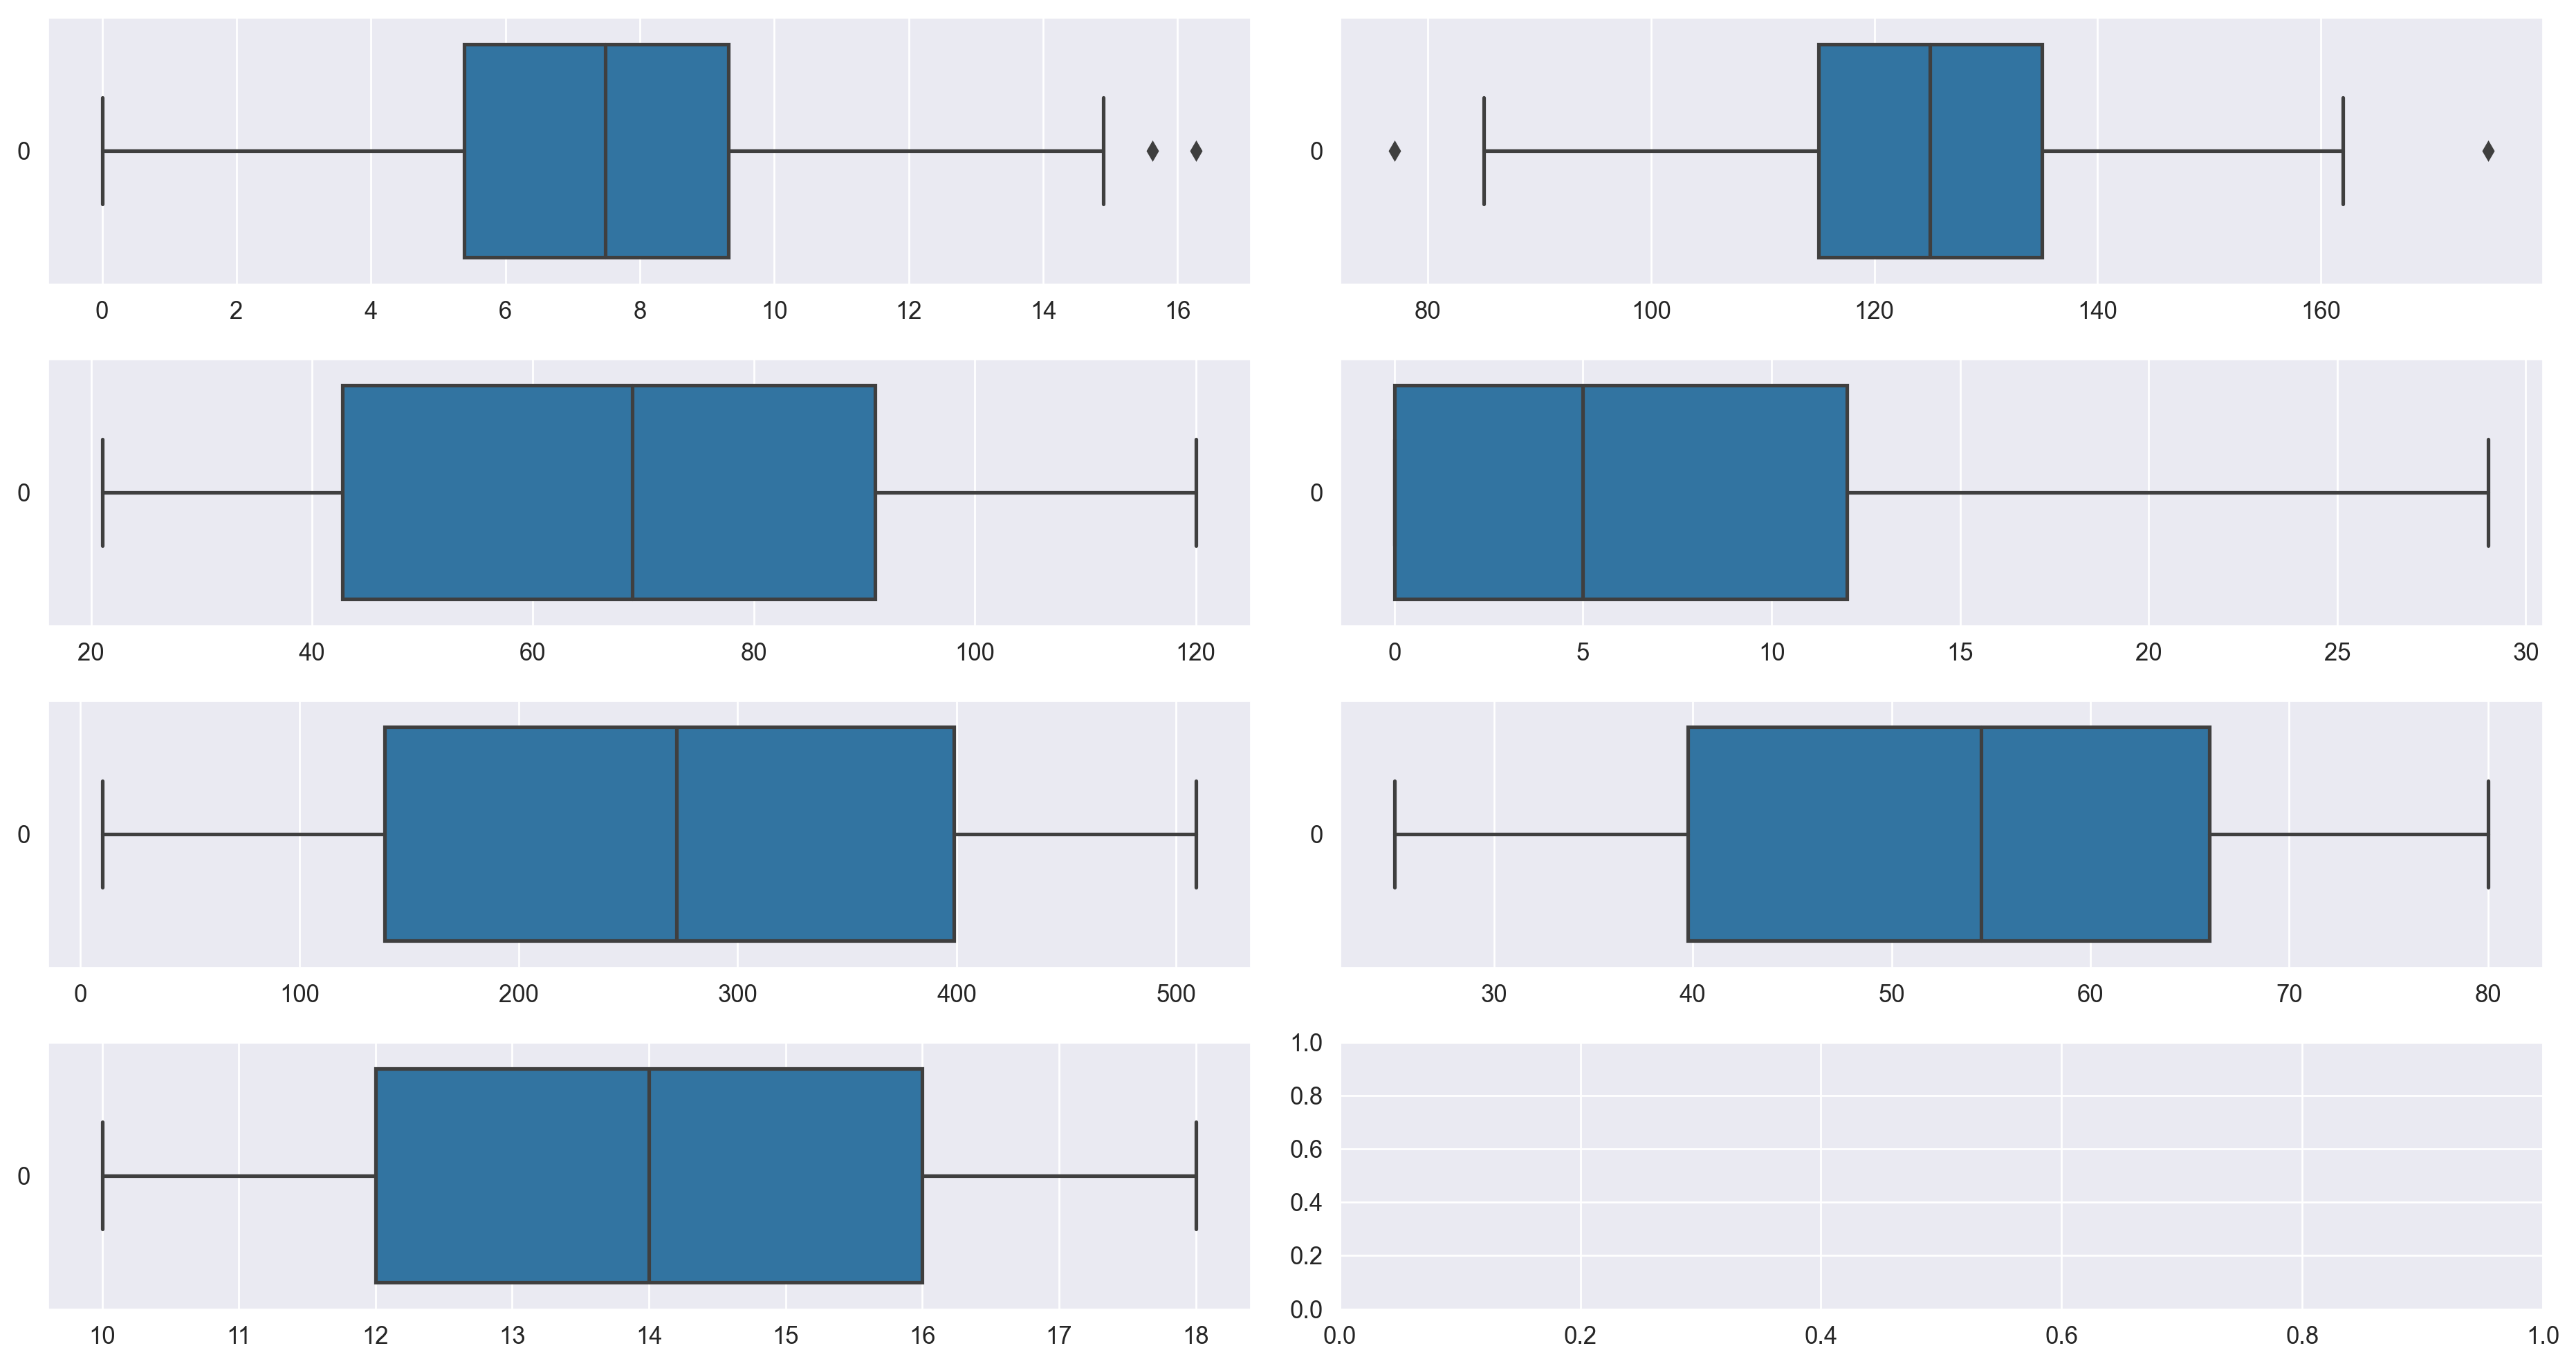

In [12]:
fig, ax = plt.subplots(4, 2)

sns.boxplot(cd['Sales'], ax = ax[0, 0], orient='h')
sns.boxplot(cd['CompPrice'], ax = ax[0, 1], orient='h')
sns.boxplot(cd['Income'], ax = ax[1, 0], orient='h')
sns.boxplot(cd['Advertising'], ax = ax[1, 1], orient='h')
sns.boxplot(cd['Population'], ax =  ax[2, 0], orient='h')
sns.boxplot(cd['Age'], ax = ax[2, 1], orient='h')
sns.boxplot(cd['Education'], ax = ax[3, 0], orient='h')

plt.tight_layout()

# Ploting Histplot

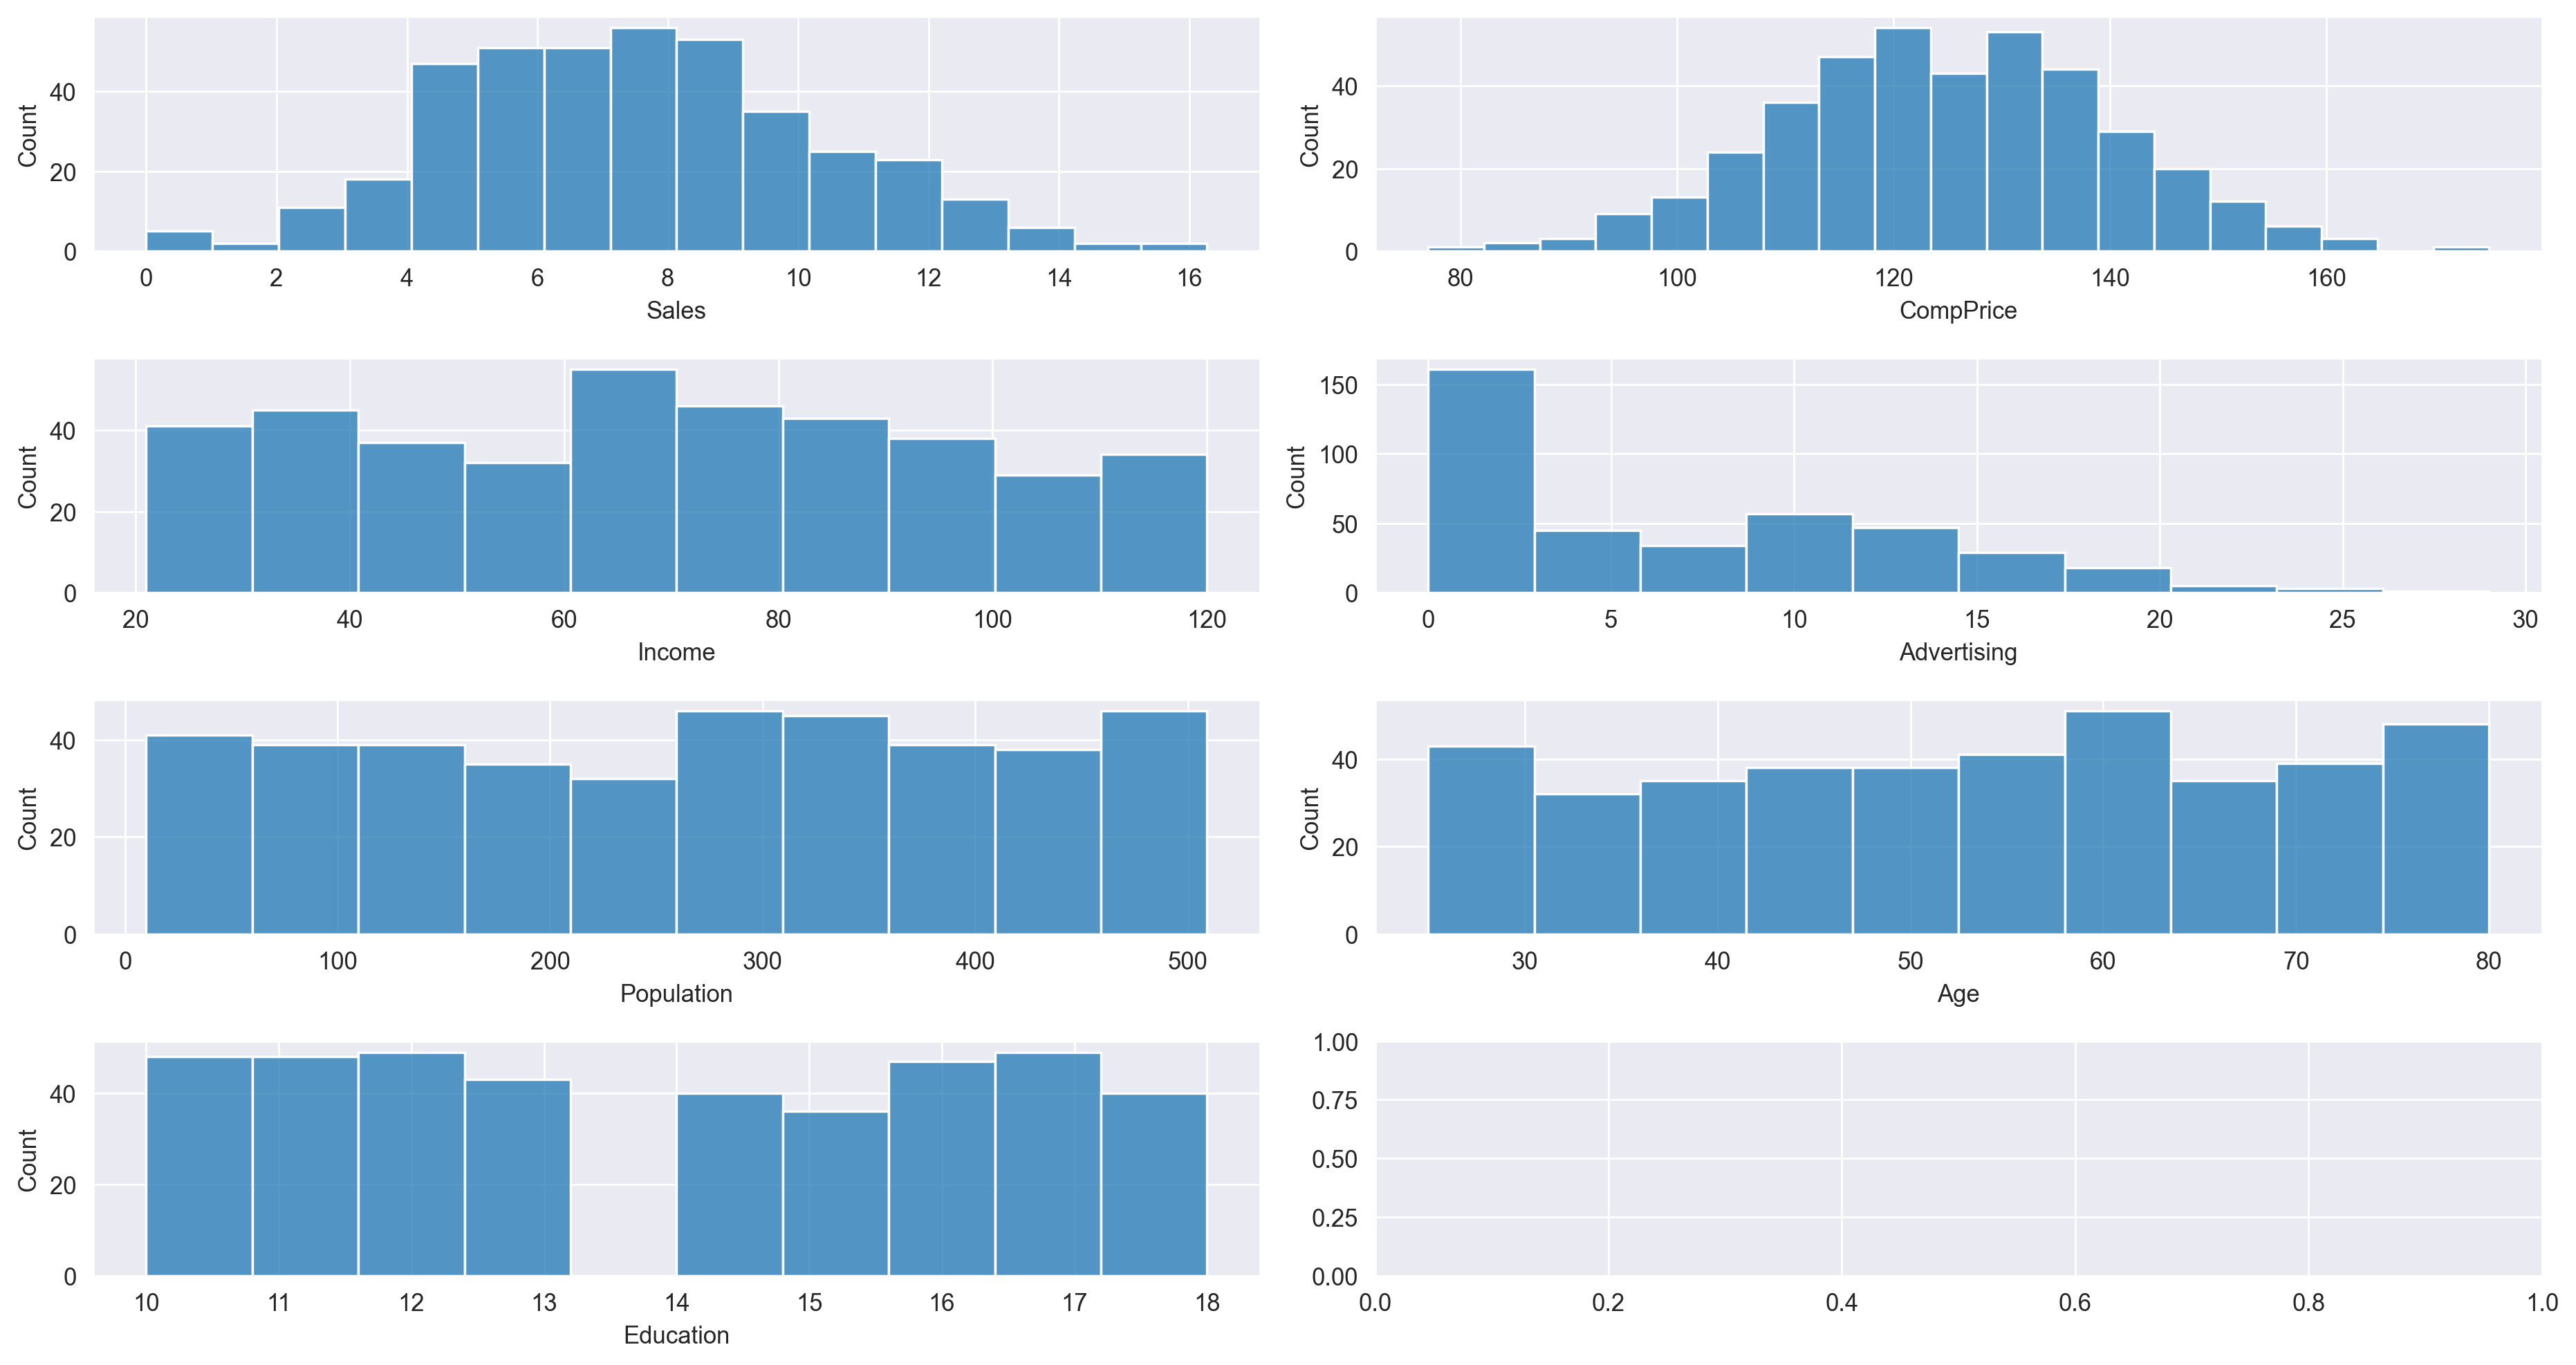

In [13]:
fig, ax = plt.subplots(4, 2)

sns.histplot(cd['Sales'], ax = ax[0, 0])
sns.histplot(cd['CompPrice'], ax = ax[0, 1])
sns.histplot(cd['Income'], ax = ax[1, 0])
sns.histplot(cd['Advertising'], ax = ax[1, 1])
sns.histplot(cd['Population'], ax = ax[2, 0])
sns.histplot(cd['Age'], ax = ax[2, 1])
sns.histplot(cd['Education'], ax = ax[3, 0])

plt.tight_layout()

## Ploting QQ-Plot

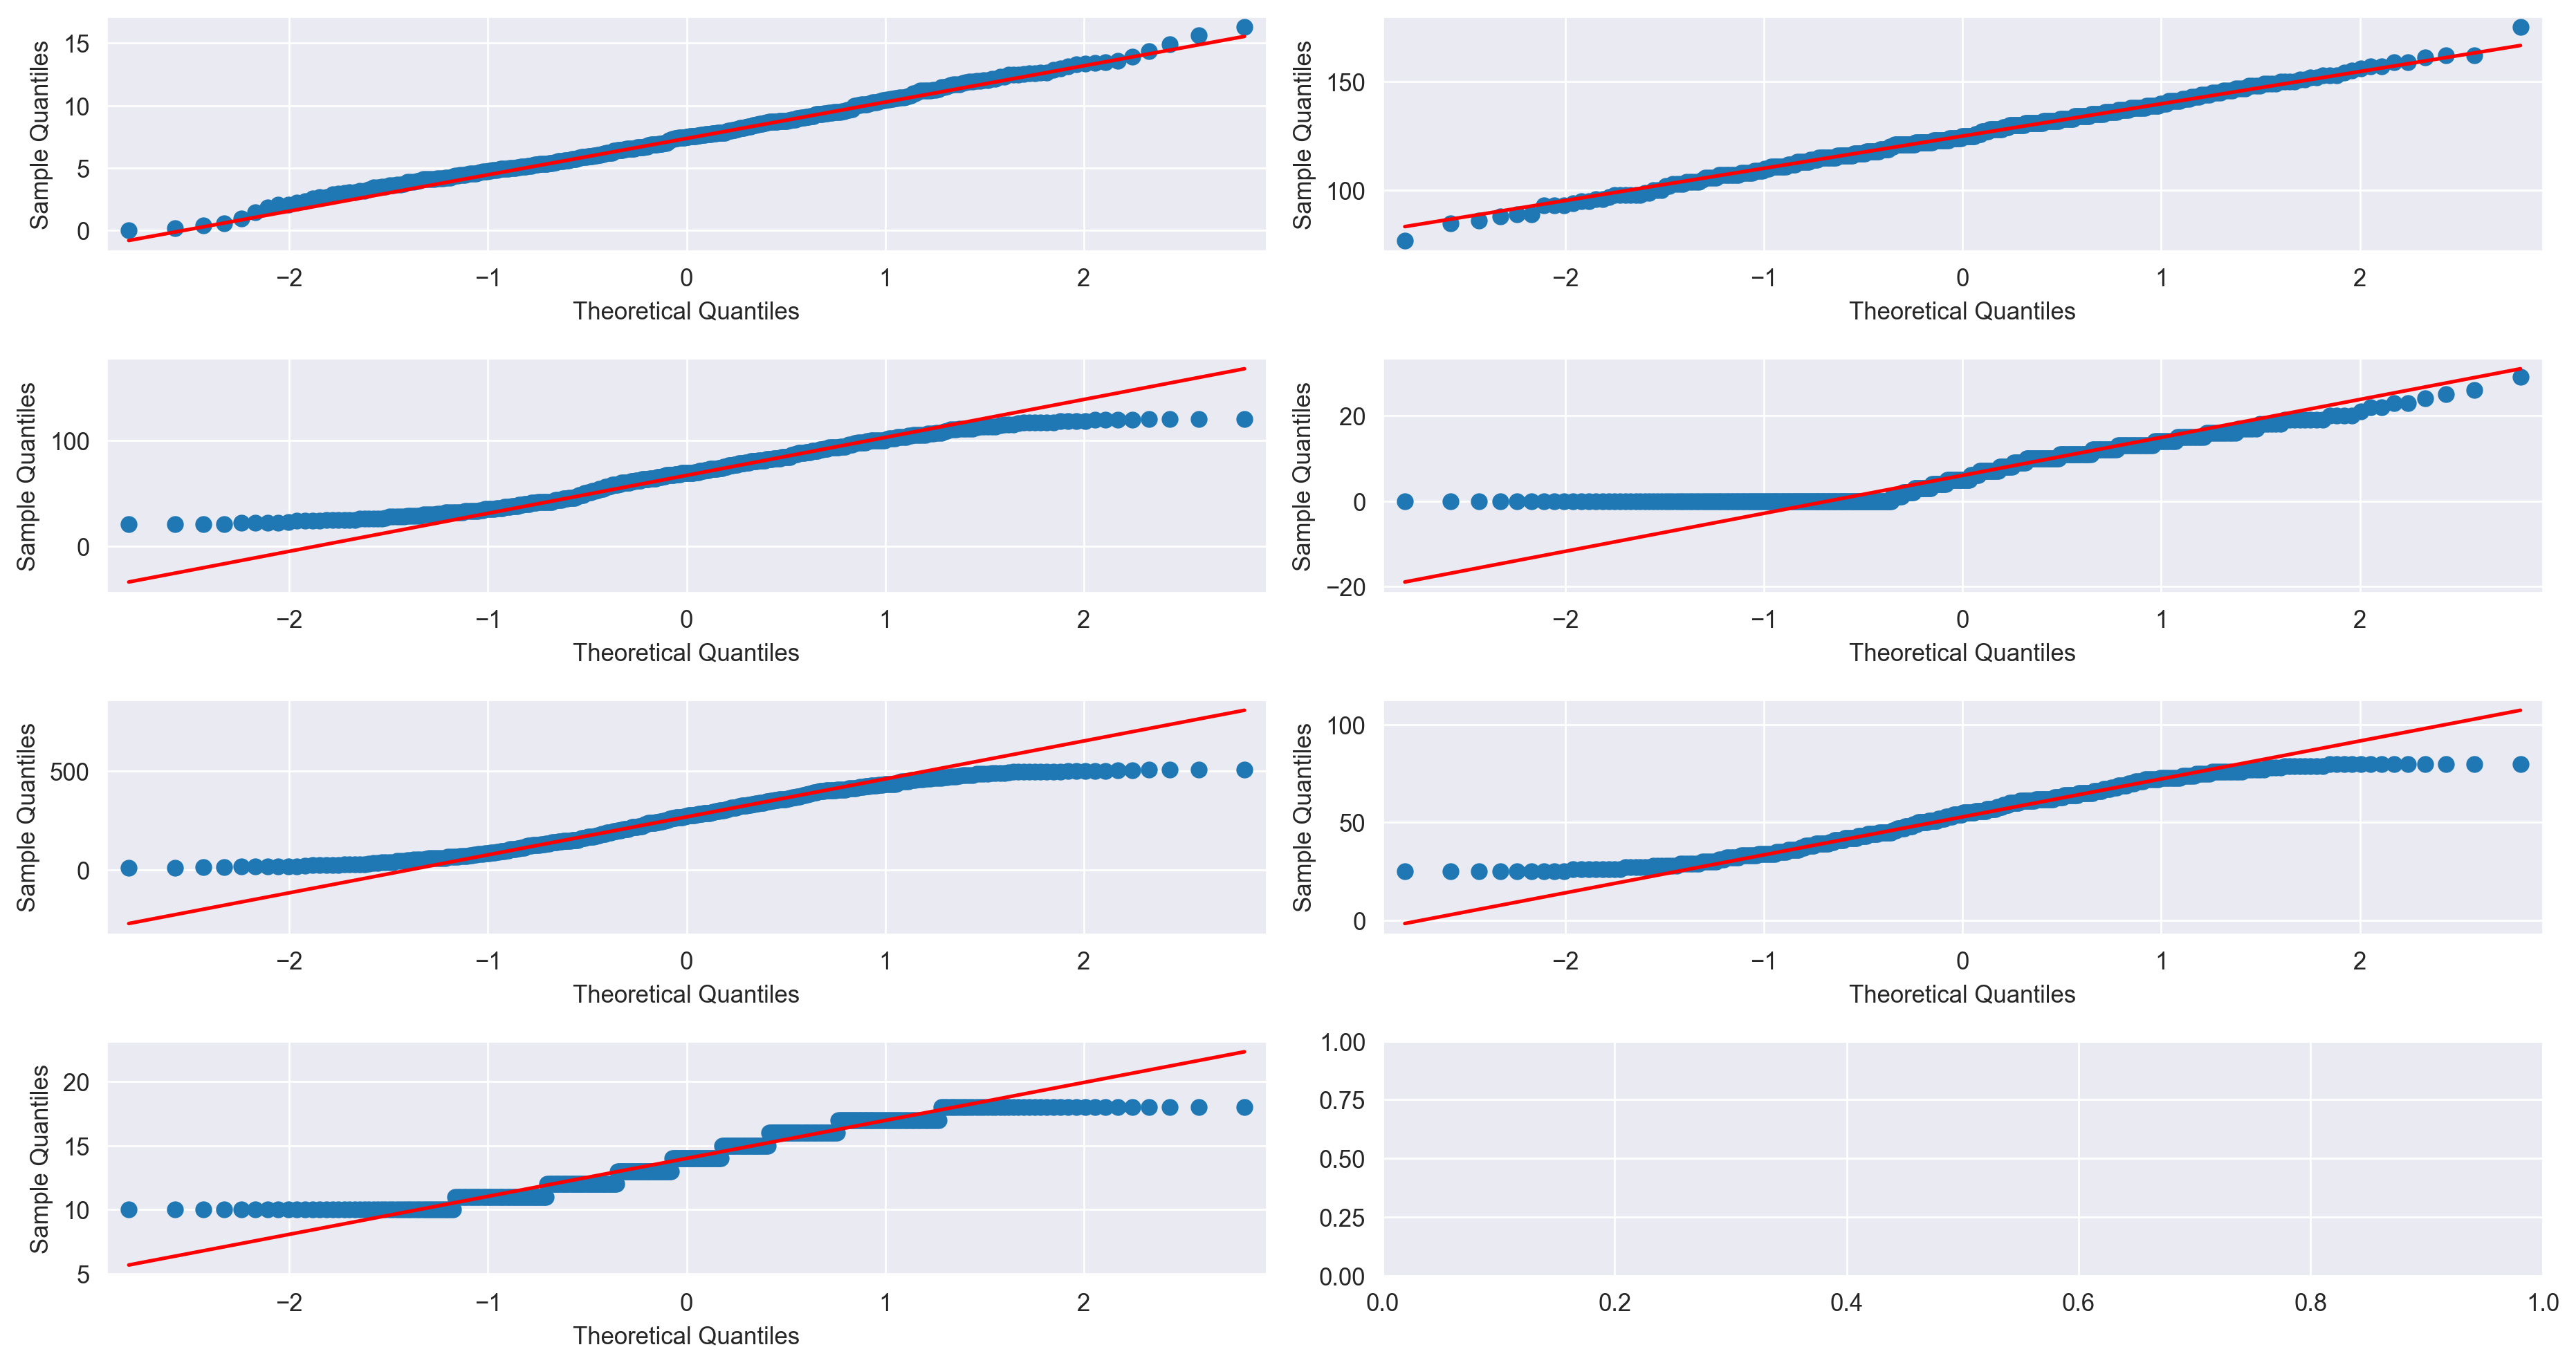

In [14]:
fig, ax = plt.subplots(4, 2)

sm.qqplot(cd['Sales'], ax=ax[0, 0], line='q')
sm.qqplot(cd['CompPrice'], ax = ax[0, 1], line='q')
sm.qqplot(cd['Income'], ax = ax[1, 0], line='q')
sm.qqplot(cd['Advertising'], ax = ax[1, 1], line='q')
sm.qqplot(cd['Population'], ax = ax[2, 0], line='q')
sm.qqplot(cd['Age'], ax = ax[2, 1], line='q')
sm.qqplot(cd['Education'], ax = ax[3, 0], line='q')

plt.tight_layout()

# Correlation Analysis

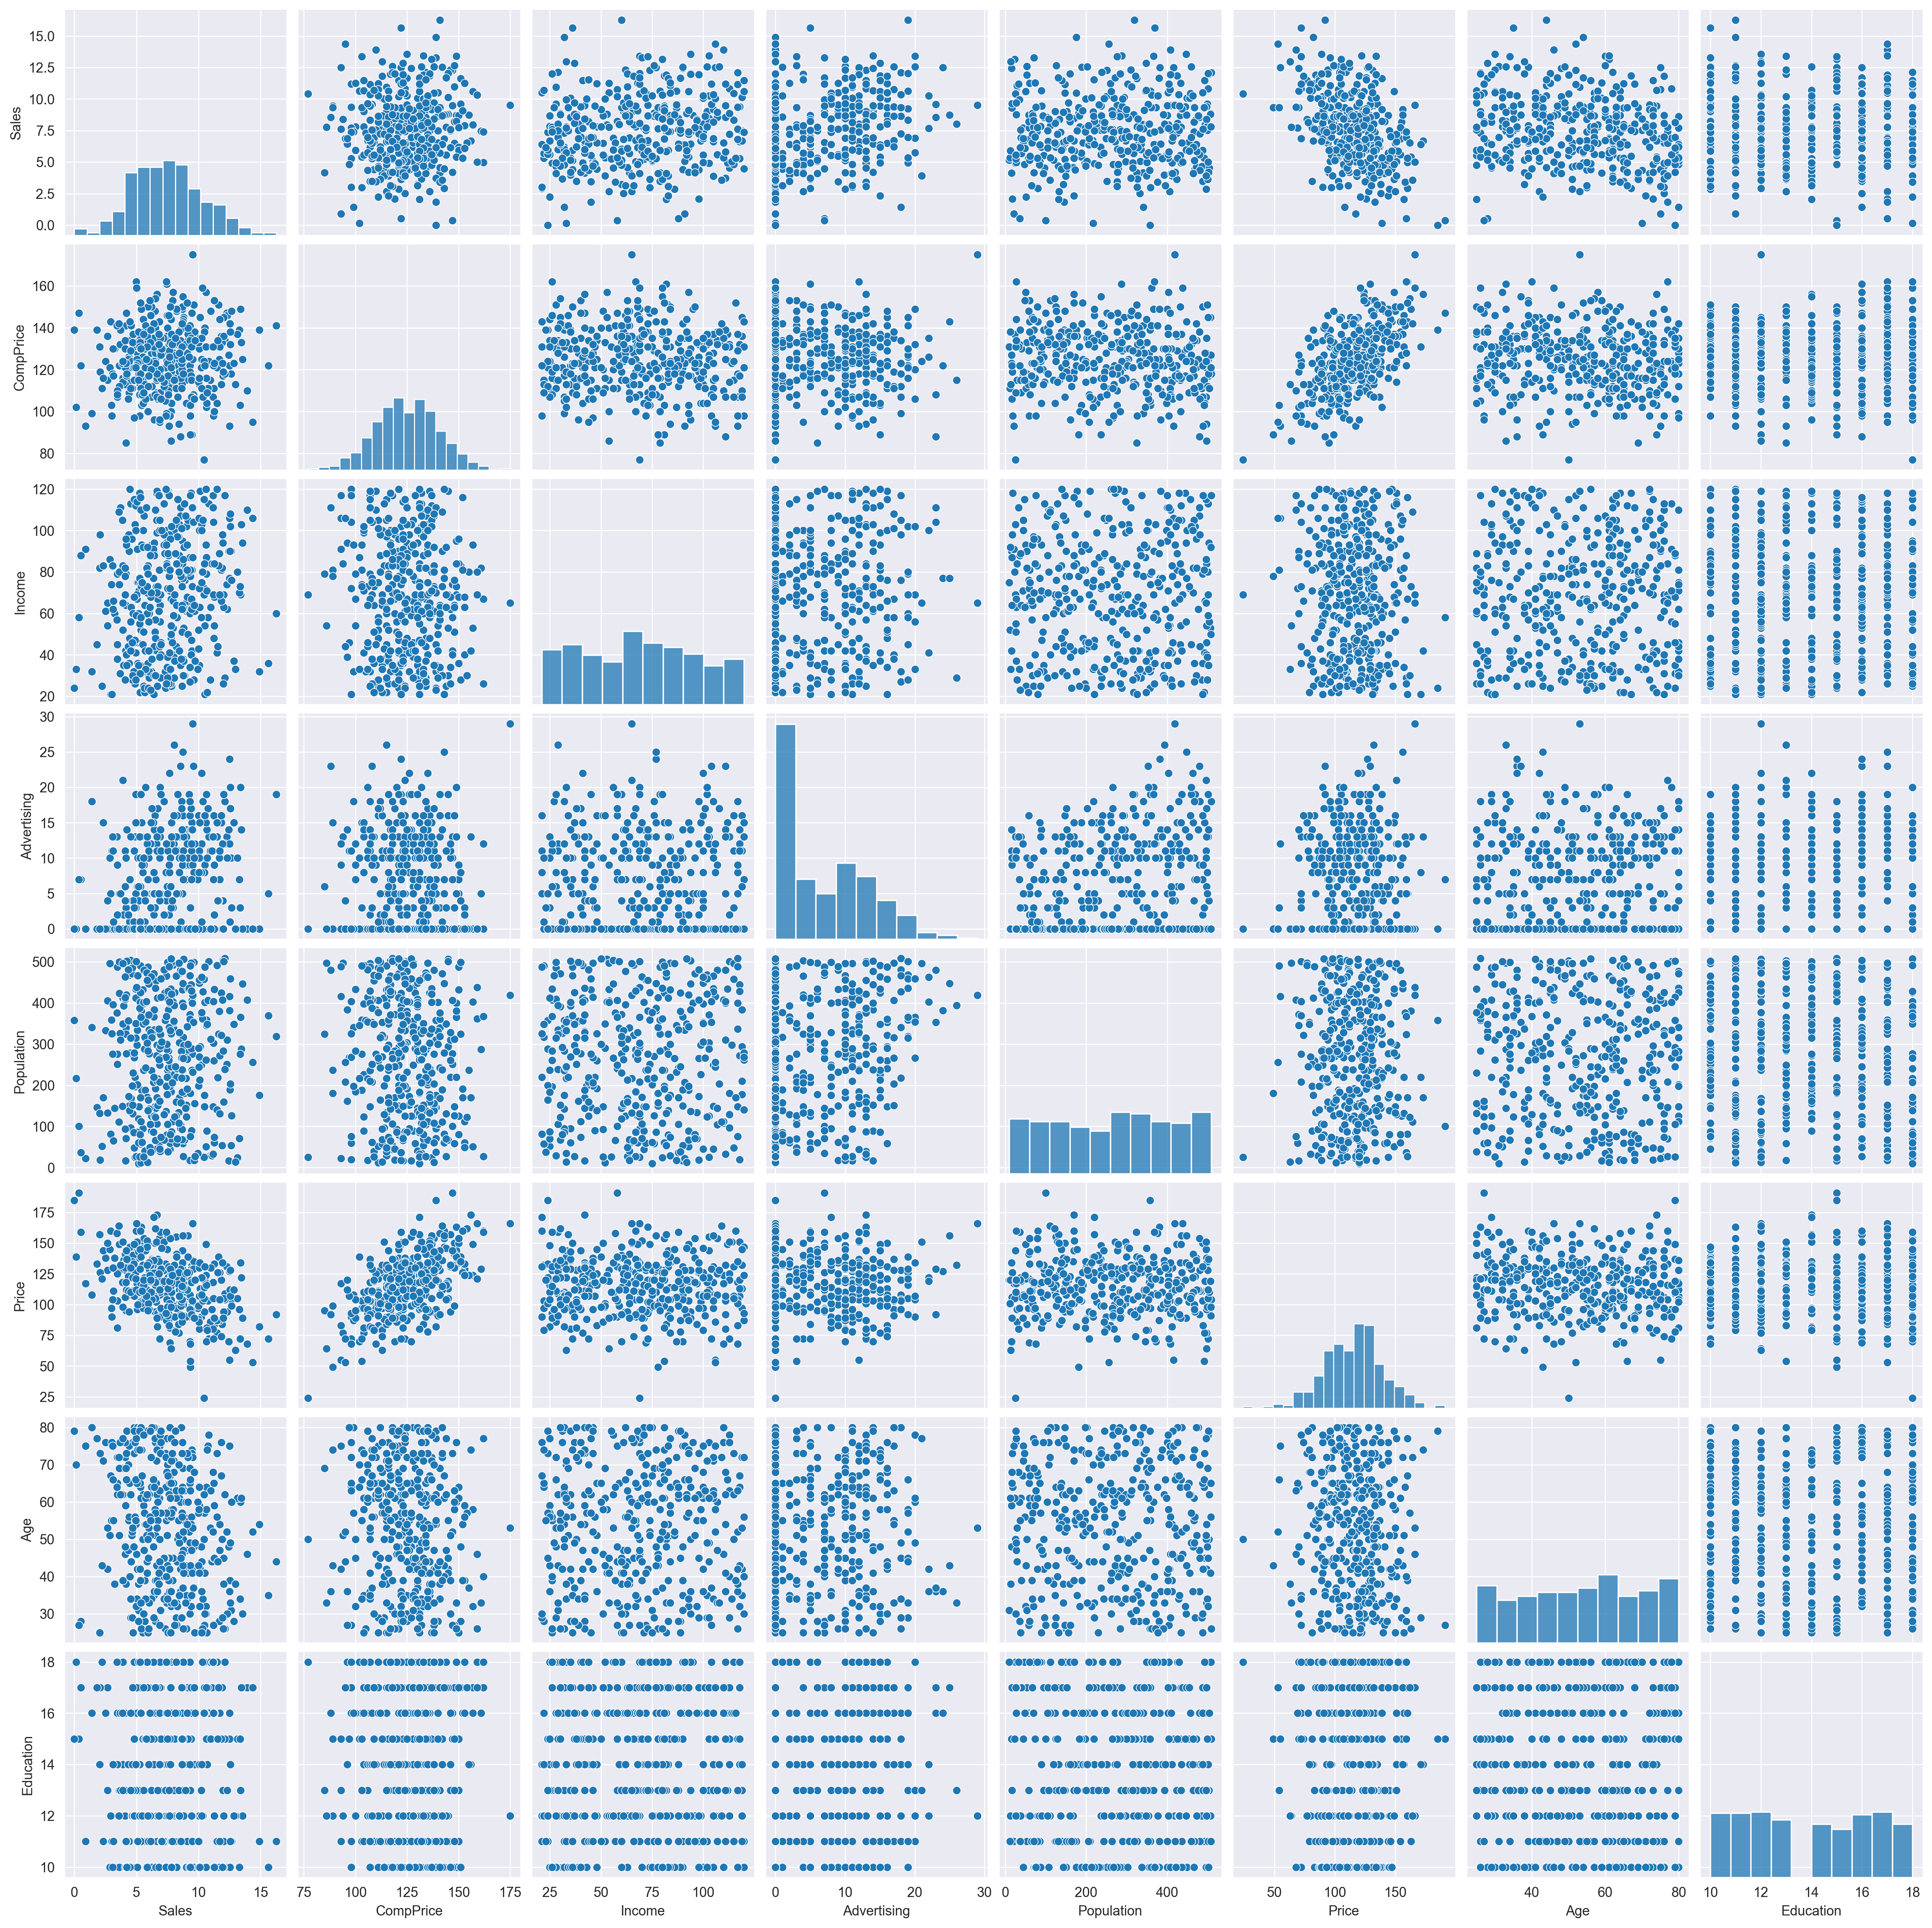

In [15]:
sns.pairplot(cd)

<Axes: >

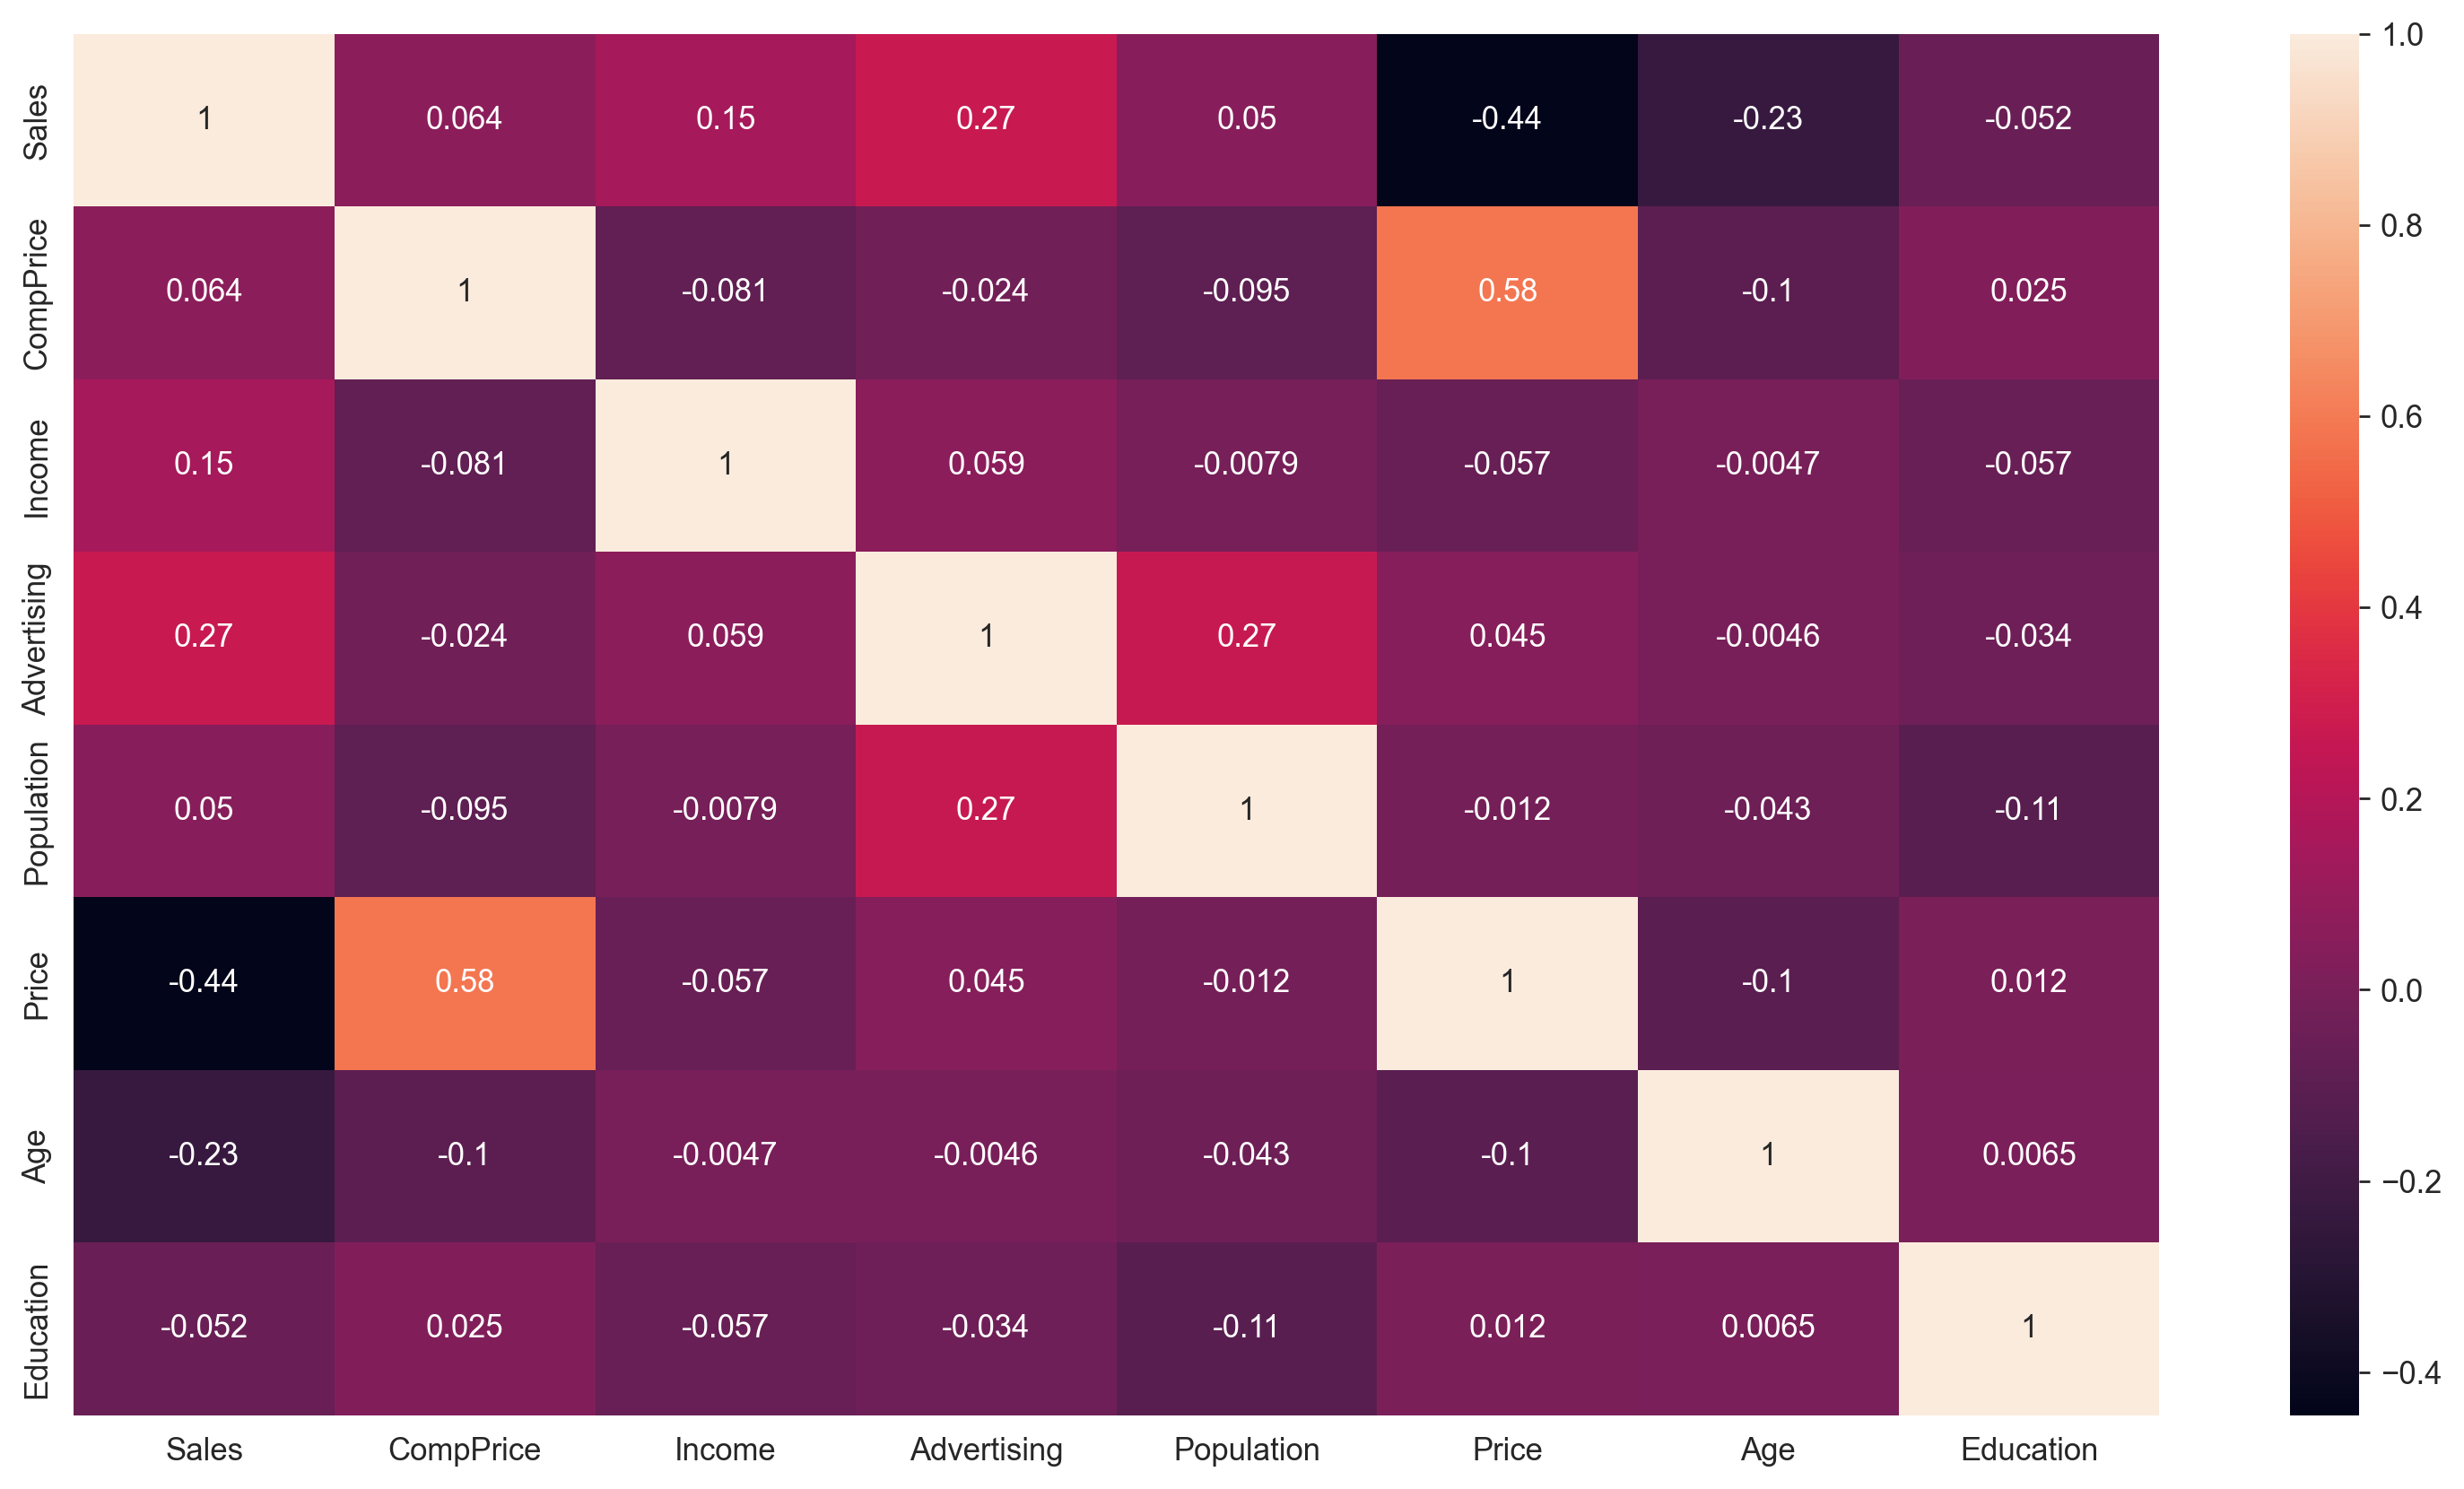

In [16]:
sns.heatmap(cd.corr(), annot=True)

# Converting Categorical Data to Numerical Data

In [17]:
le = LabelEncoder()

# Converting ShelveLoc Data to Numerical Data



In [18]:
cd['ShelveLoc'] = le.fit_transform(cd['ShelveLoc'])

cd

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

# Converting Urban Data to Numerical Data

In [19]:
cd['Urban'] = le.fit_transform(cd['Urban'])

cd

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban   US  
0           17      1  Yes  
1           10      1  Yes  
2           12      1  Yes  
3           14      1  Yes  
4           13      1   No  
..         ...    ...  ...  
395         14      1  Yes  
396         11      0  Yes  
397         18      1  Yes  
398         12      1  Yes  
399         16      1  Yes  

[400 rows x 11 columns]

# Converting US Data to Numerical Data

In [20]:
cd['US'] = le.fit_transform(cd['US'])

cd

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

# Outlier Detection

In [21]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')

In [22]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)

In [23]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st

# Outlier Percentage (Before)

In [24]:
outlier_percentage(cd)

Sales : 0.5 %
CompPrice : 0.5 %
Income : 0.0 %
Advertising : 0.0 %
Population : 0.0 %
Price : 1.25 %
ShelveLoc : 0.0 %
Age : 0.0 %
Education : 0.0 %
Urban : 0.0 %
US : 0.0 %



# Removing Outlier In Sales Column

In [25]:
pe.box(cd['Sales'], orientation='h')

In [26]:
cd = remove_outlier(cd, 'Sales')

In [27]:
pe.box(cd['Sales'], orientation='h')

In [28]:
lost_record()

We lost 0.5 % data


# Removing Outlier In CompPrice Column

In [29]:
pe.box(cd['Price'], orientation='h')

In [30]:
cd = remove_outlier(cd, 'Price')

In [31]:
pe.box(cd['Price'], orientation='h')

In [32]:
lost_record()

We lost 2.0 % data


# Outlier Percentage (After)

In [33]:
outlier_percentage(cd)

Sales : 0.25510204081632654 %
CompPrice : 0.25510204081632654 %
Income : 0.0 %
Advertising : 0.0 %
Population : 0.0 %
Price : 0.25510204081632654 %
ShelveLoc : 0.0 %
Age : 0.0 %
Education : 0.0 %
Urban : 0.0 %
US : 0.0 %


Reindexing Columns

In [34]:
cd.reset_index(inplace=True)
cd.drop(columns='index', inplace=True)

cd

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
387  12.57        138     108           17         203    128          1   33   
388   6.14        139      23            3          37    120          2   55   
389   7.41        162      26           12         368    159          2   40   
390   5.94        100      79            7         284     95          0   50   
391   9.71        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
387         14      1   1  
388         11      0   1  
389         18      1   1  
390         12      1   1  
391         16      1   1  

[392 rows x 11 columns]

In [35]:
cd1=cd.copy()


In [36]:
cd1["Sales"].describe()


count    392.000000
mean       7.456097
std        2.708758
min        0.160000
25%        5.390000
50%        7.445000
75%        9.180000
max       14.900000
Name: Sales, dtype: float64

In [37]:
cd1["Sales"]=pd.cut(cd1["Sales"],bins=[0,8,16],labels=["low","high"])
cd1

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0    high        138      73           11         276    120          0   42   
1    high        111      48           16         260     83          1   65   
2    high        113      35           10         269     80          2   59   
3     low        117     100            4         466     97          2   55   
4     low        141      64            3         340    128          0   38   
..    ...        ...     ...          ...         ...    ...        ...  ...   
387  high        138     108           17         203    128          1   33   
388   low        139      23            3          37    120          2   55   
389   low        162      26           12         368    159          2   40   
390   low        100      79            7         284     95          0   50   
391  high        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
387         14      1   1  
388         11      0   1  
389         18      1   1  
390         12      1   1  
391         16      1   1  

[392 rows x 11 columns]

In [38]:
cd1["Sales"].value_counts()

low     234
high    158
Name: Sales, dtype: int64

In [39]:
le= LabelEncoder()
cd1["Sales"]=le.fit_transform(cd1["Sales"])
cd1["ShelveLoc"]=le.fit_transform(cd1["ShelveLoc"])
cd1["Urban"]=le.fit_transform(cd1["Urban"])
cd1["US"]=le.fit_transform(cd1["US"])
cd1.head()


Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0      0        138      73           11         276    120          0   42   
1      0        111      48           16         260     83          1   65   
2      0        113      35           10         269     80          2   59   
3      1        117     100            4         466     97          2   55   
4      1        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0

# Splitting The Data Into Target and Independent set

In [40]:
x=cd.iloc[:,1:]
y=cd.iloc[:,0]
print(x)
y.head()

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
387        138     108           17         203    128          1   33   
388        139      23            3          37    120          2   55   
389        162      26           12         368    159          2   40   
390        100      79            7         284     95          0   50   
391        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

In [41]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=40)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(294, 10) (98, 10) (294,) (98,)


In [42]:
x = cd1.iloc[:,1:]
y = cd1.iloc[:,0]
print(x)
y.head()

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
387        138     108           17         203    128          1   33   
388        139      23            3          37    120          2   55   
389        162      26           12         368    159          2   40   
390        100      79            7         284     95          0   50   
391        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

0    0
1    0
2    0
3    1
4    1
Name: Sales, dtype: int32

In [43]:
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
387        138     108           17         203    128          1   33   
388        139      23            3          37    120          2   55   
389        162      26           12         368    159          2   40   
390        100      79            7         284     95          0   50   
391        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
387         14      1   1  
388         11      0   1  
389         18      1   1  
390         12      1   1  
391         16      1   1  

[392 rows x 10 columns]

In [44]:
y

0      0
1      0
2      0
3      1
4      1
      ..
387    0
388    1
389    1
390    1
391    0
Name: Sales, Length: 392, dtype: int32

# Normalizing The Dataset

In [45]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [46]:
scaled_x

CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
0     0.855125  0.151623     0.649717    0.075442  0.167094  -1.564353   
1    -0.948151 -0.740814     1.402345   -0.033209 -1.513584  -0.366645   
2    -0.814575 -1.204882     0.499192    0.027908 -1.649855   0.831062   
3    -0.547423  1.115456    -0.403961    1.365672 -0.877651   0.831062   
4     1.055489 -0.169654    -0.554487    0.510046  0.530484  -1.564353   
..         ...       ...          ...         ...       ...        ...   
387   0.855125  1.401036     1.552871   -0.420277  0.530484  -0.366645   
388   0.921913 -1.633252    -0.554487   -1.547530  0.167094   0.831062   
389   2.458036 -1.526159     0.800243    0.700185  1.938620   0.831062   
390  -1.682819  0.365808     0.047615    0.129768 -0.968499  -1.564353   
391   0.587973 -1.133487    -1.006064   -1.615437  0.167094  -0.366645   

          Age  Education     Urban        US  
0   -0.704476   1.187112  0.648298  0.732977  
1    0.716772  -1.487301  0.648298  0.732977  
2    0.346012  -0.723183  0.648298  0.732977  
3    0.098838   0.040935  0.648298  0.732977  
4   -0.951650  -0.341124  0.648298 -1.364300  
..        ...        ...       ...       ...  
387 -1.260617   0.040935  0.648298  0.732977  
388  0.098838  -1.105242 -1.542501  0.732977  
389 -0.828063   1.569171  0.648298  0.732977  
390 -0.210129  -0.723183  0.648298  0.732977  
391 -0.271923   0.805053  0.648298  0.732977  

[392 rows x 10 columns]


# Splitting The Data Into Training And Testing Set

In [47]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [48]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

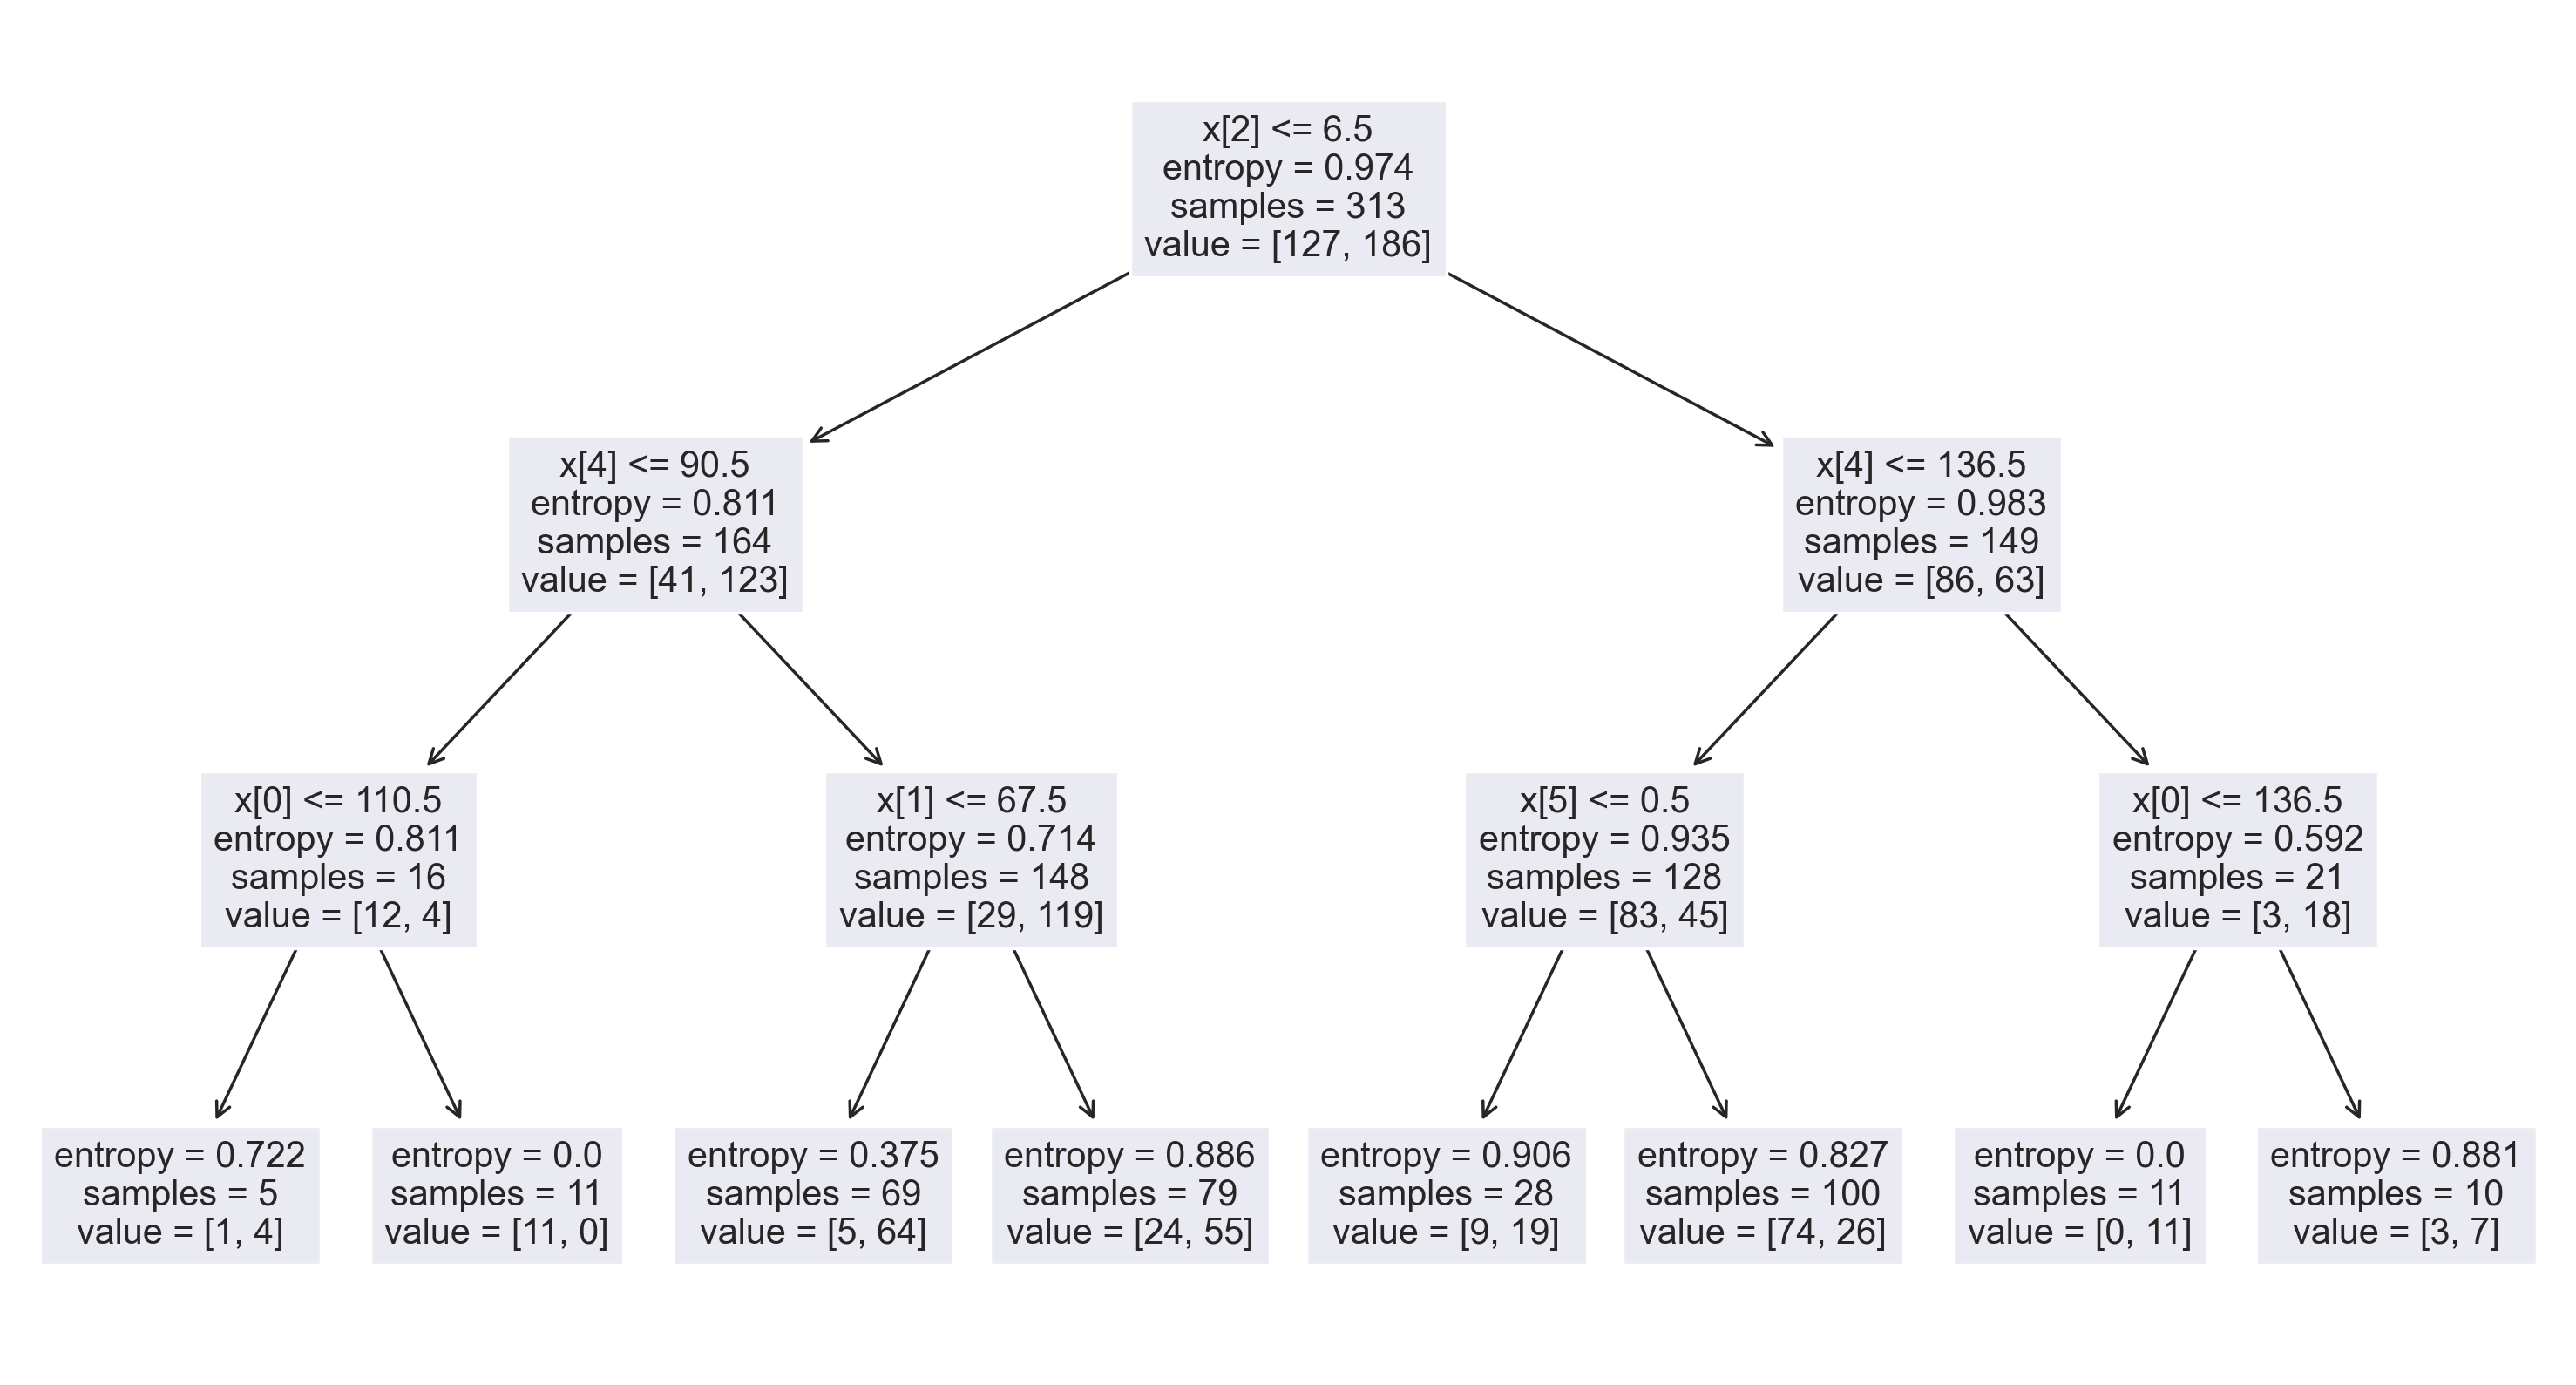

In [49]:
tree.plot_tree(model);

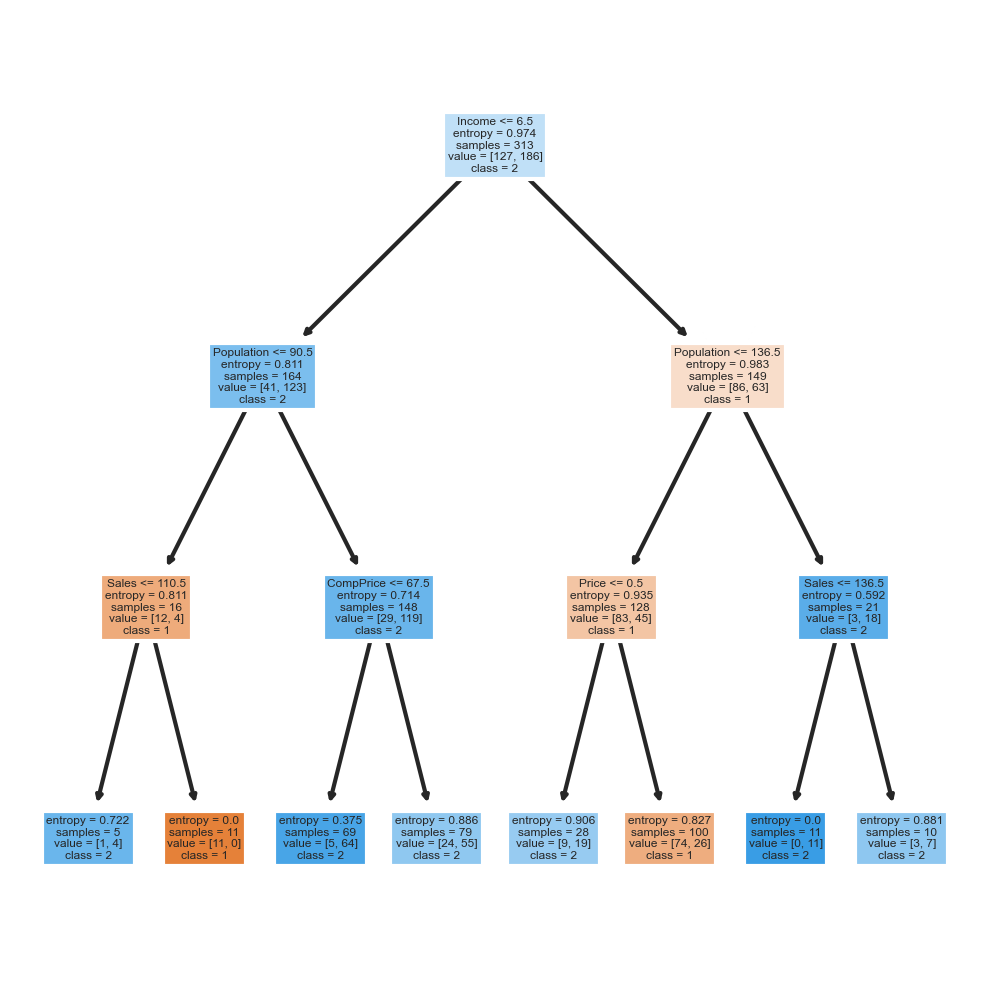

In [50]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [51]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1    51
0    28
dtype: int64

In [52]:
preds

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [53]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong 

col_0   0   1
Sales        
0      19  12
1       9  39

In [54]:
# Accuracy 
np.mean(preds==y_test)

0.7341772151898734

Building Decision Tree Classifier (CART) using Gini Criteria

In [55]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

[Text(0.5, 0.875, 'x[2] <= 6.5\ngini = 0.482\nsamples = 313\nvalue = [127, 186]'),
 Text(0.25, 0.625, 'x[4] <= 90.5\ngini = 0.375\nsamples = 164\nvalue = [41, 123]'),
 Text(0.125, 0.375, 'x[0] <= 110.5\ngini = 0.375\nsamples = 16\nvalue = [12, 4]'),
 Text(0.0625, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.375, 0.375, 'x[0] <= 144.5\ngini = 0.315\nsamples = 148\nvalue = [29, 119]'),
 Text(0.3125, 0.125, 'gini = 0.253\nsamples = 128\nvalue = [19, 109]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.75, 0.625, 'x[5] <= 0.5\ngini = 0.488\nsamples = 149\nvalue = [86, 63]'),
 Text(0.625, 0.375, 'x[4] <= 80.5\ngini = 0.382\nsamples = 35\nvalue = [9, 26]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6875, 0.125, 'gini = 0.271\nsamples = 31\nvalue = [5, 26]'),
 Text(0.875, 0.375, 'x[5] <= 1.5\ngini = 0.438\nsamples = 114\nvalue = [77, 37]'),
 Text(0.81

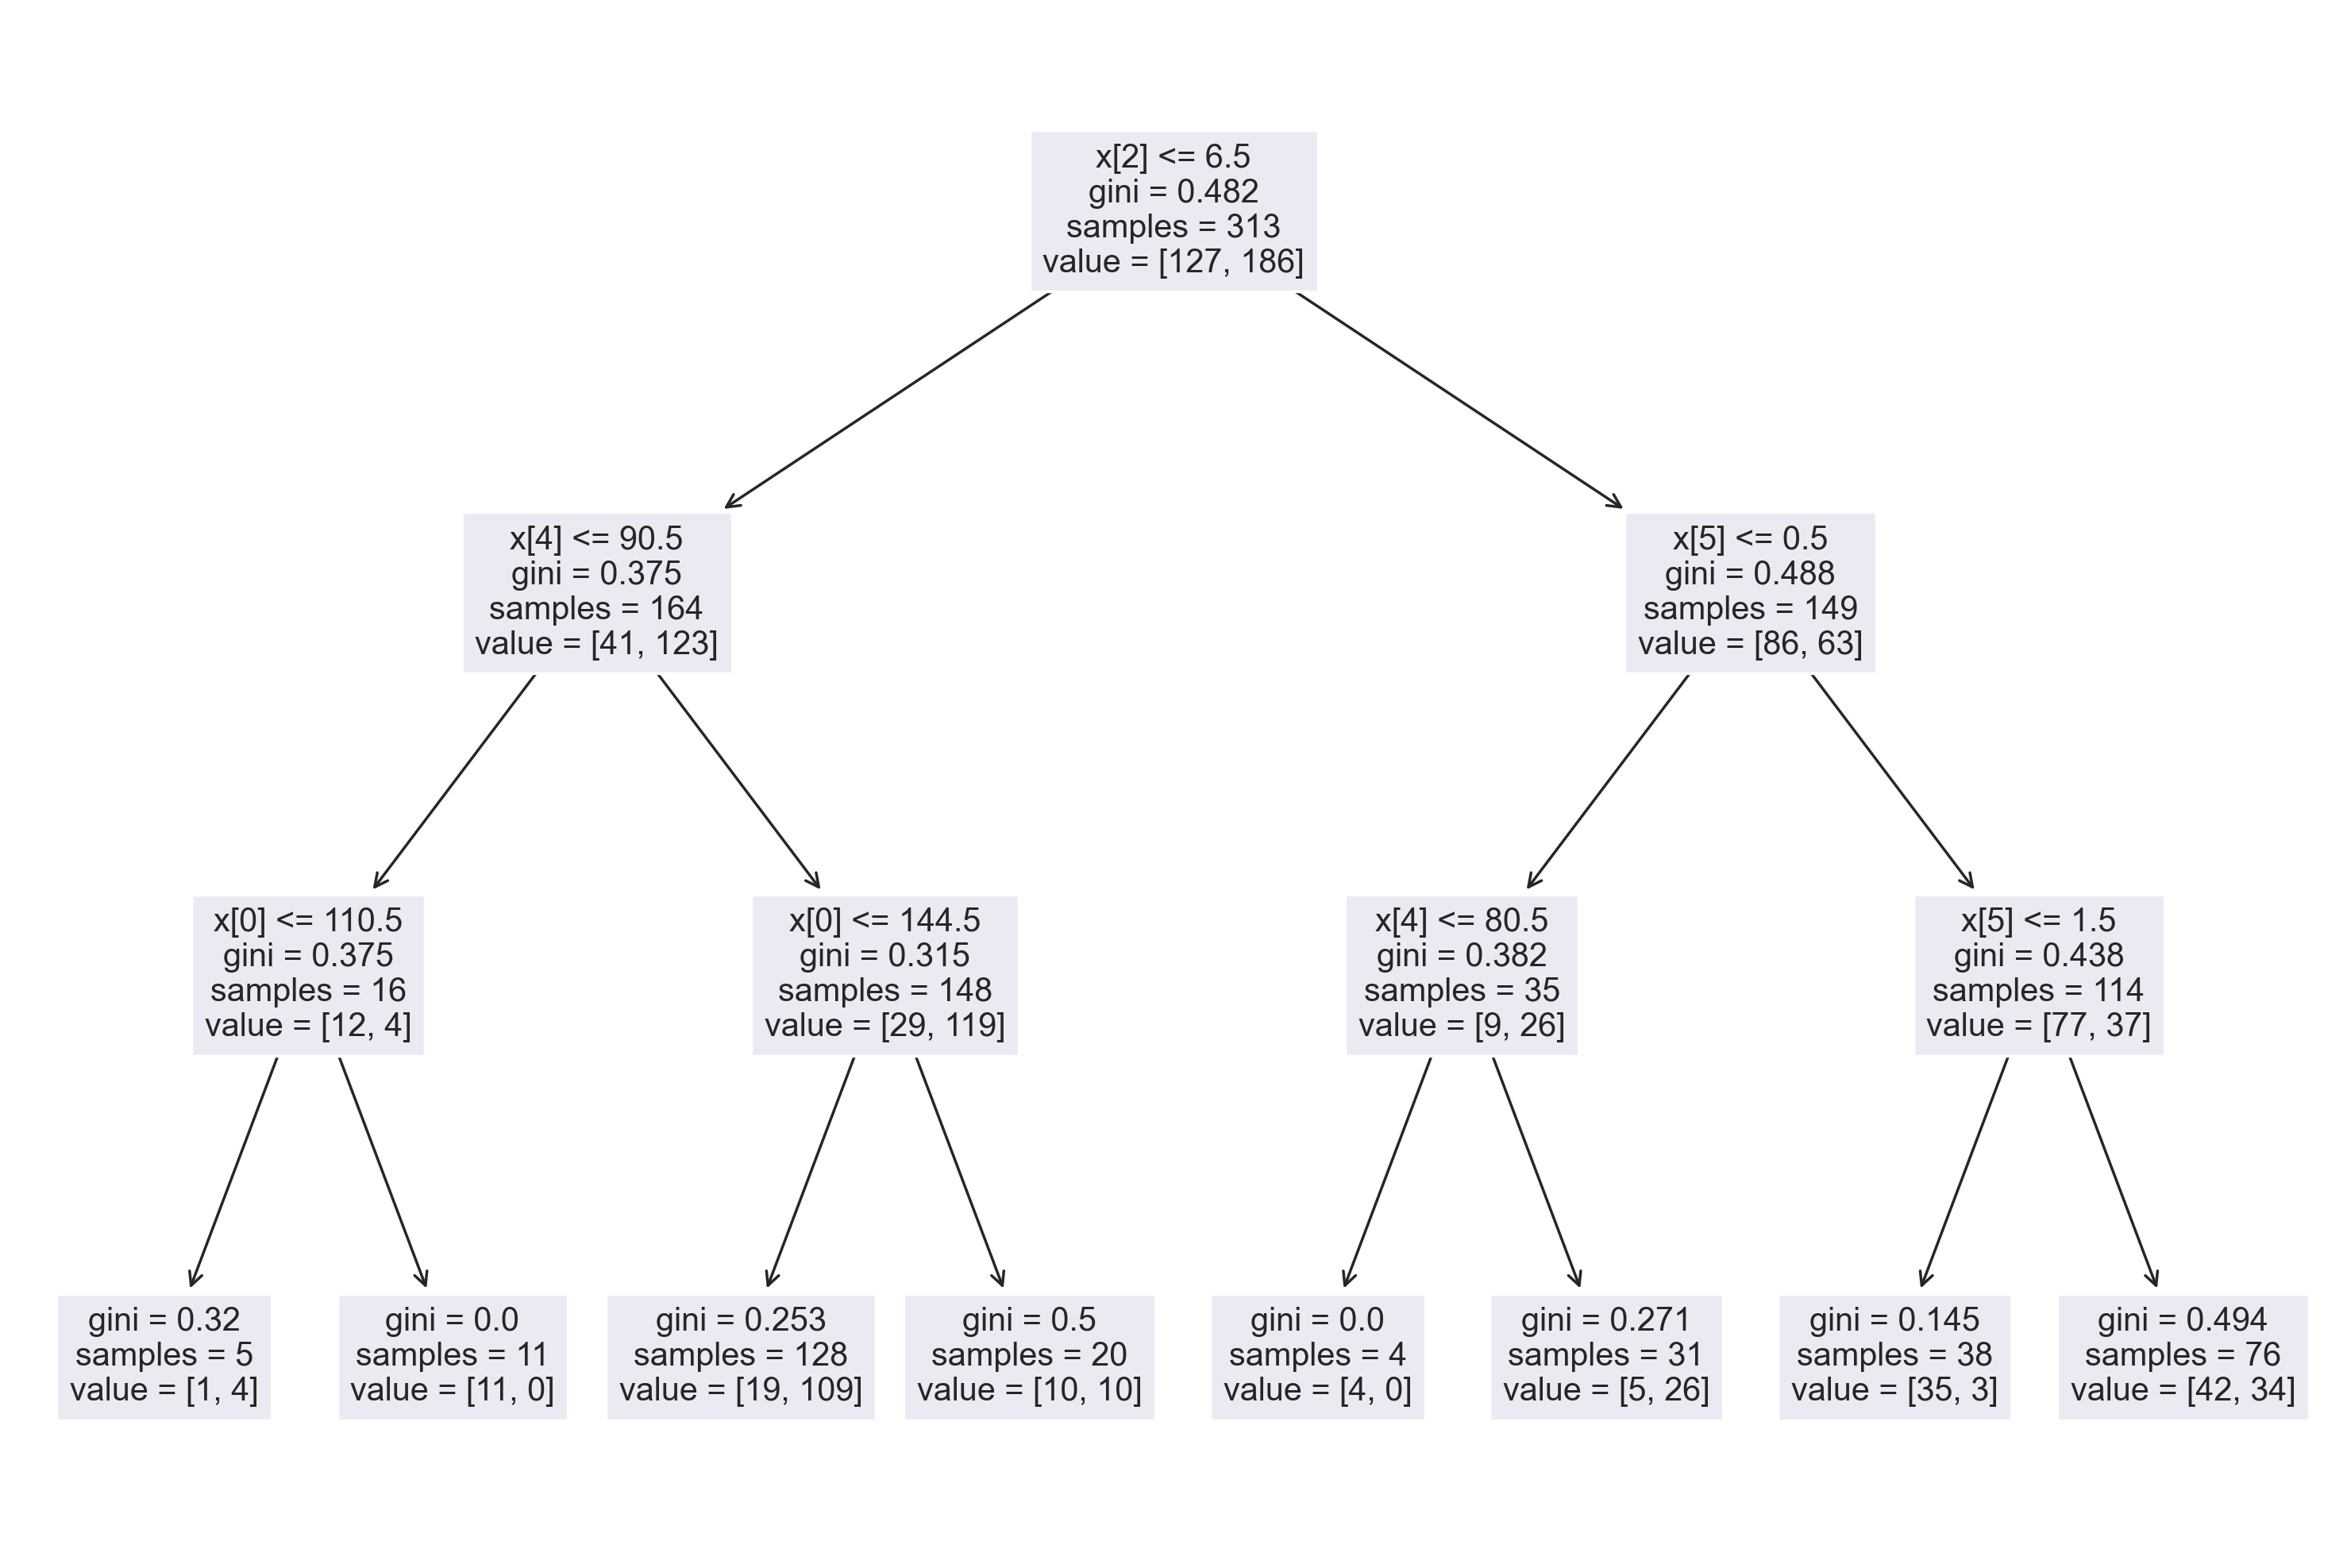

In [56]:
model_gini.fit(x_train, y_train)
plt.figure(figsize=(15,10))
tree.plot_tree(model_gini)

In [63]:
preds_gini=model_gini.predict(x_test)
preds_gini

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
array = cd.values
X = array[:,0:3]
y = array[:,3]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [73]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [74]:
#Find the accuracy
model.score(X_test,y_test)

-0.9641195709105694